In [2]:
using Statistics 
using Plots
using LaTeXStrings
using DelimitedFiles

# Mismatch landscapes 

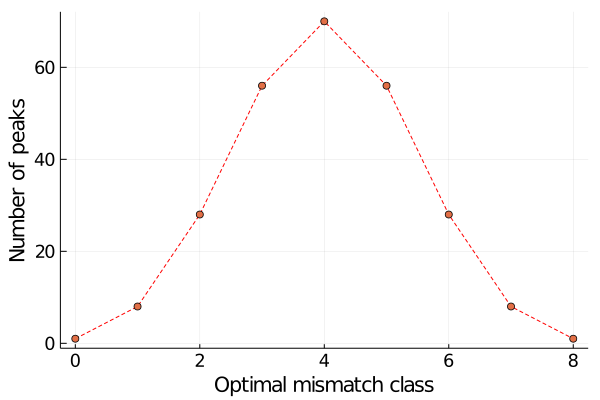

In [17]:
#### calculated using Genonets #########

L=8
peak_list=zeros(Float64,2*(L+1))
for kopt in collect(0:1:L) 
    result=readdlm("/Users/malvika/Desktop/Aim4/results_mismatch_kopt=$kopt/Genotype_set_measures.csv")
    peak_list[2*kopt+1]=result[2,2]
    result2=readdlm("/Users/malvika/Desktop/Aim4/results_mismatch_int_kopt=$kopt/Genotype_set_measures.csv")
    peak_list[2*kopt+2]=result2[2,2]
end


plot(collect(0:1:L) ,peak_list[1:2:end],guidefontsize=14, tickfontsize=12,linestyle=:dash,linecolor=:red)
scatter!(collect(0:1:L) ,peak_list[1:2:end],legend=:false, xlabel="Optimal mismatch class", ylabel="Number of peaks")

# Empirical landscapes 

## 1. Reading the input data

In [7]:
data=readdlm("landscapes.txt") # Path to landscapes.txt
tot=1131#length(unique(data[2:end,1]))

lands=Array{Any}(undef,1500,3,tot) 
TFs=Array{String}(undef,tot)
k=1
j=1
n=1
for i in collect(2:1:443976)
 
    if data[i+1,1]==data[i,1]
        TFs[n]=data[i,1]
        lands[k,2,j]=data[i,4]
        lands[k,1,j]=data[i,3]
        lands[k,3,j]=data[i,2]
        k+=1
    elseif data[i+1,1]!=data[i,1] 
        n+=1
        TFs[n]=data[i+1,1]
     
        lands[k,2,j]=data[i,4]
        lands[k,1,j]=data[i,3]
        lands[k,3,j]=data[i,2]
        
       
        for g in collect(k+1:1:1500)
            lands[g,1,j]=0
            lands[g,2,j]=0
            lands[g,3,j]=0
        end
        
        k=1;j+=1
       
    end
end



In [8]:
dat=readdlm("NEE_data.tsv",'\t')
AllTF=Array{Any,1}(undef,1137)
AllTF[1:991]=dat[2:992,2]
AllTF[992:end]=dat[993:end,1]

for i in collect(1:1:991)
    AllTF[i]=AllTF[i][1:7]
end

#### Finding the missing landscapes in precious data ##########

k=1
Js=zeros(Int64,16)
miss=Array{Any,1}(undef,16)
for j in collect(1:1:1137)
    
    c=0
    for i in collect(1:1:1130)
        if AllTF[j]!=TFs[i]
            c+=1
        end
    end
    if c==1130
        println(j," ",AllTF[j])
        Js[k]=j
        miss[k]=AllTF[j]
        k+=1
        
    end
end

miss

73 T102226
185 T099674
365 T075417
478 T161537
494 T161514
570 T004581
581 T004584
588 T027553
593 T161559
686 T110196
716 T023765
736 T161557
810 T075017
896 T071181
987 T000668
1128 Sut2


16-element Array{Any,1}:
 "T102226"
 "T099674"
 "T075417"
 "T161537"
 "T161514"
 "T004581"
 "T004584"
 "T027553"
 "T161559"
 "T110196"
 "T023765"
 "T161557"
 "T075017"
 "T071181"
 "T000668"
 "Sut2"

## 2. Creating a lookup table

In [10]:
d=dat
lookup=vcat(TFs[1:1130],miss)

for i in collect(1:1:1146)
    if i==1035 || i==1036 || i==1037 || i==1013 || i==1038 || i==1039 || i==1040 || i==1058 || i==1077 
        lookup[i]="null"
    else
        for j in collect(1:1:1138)
            if lookup[i]==d[j,2]
                lookup[i]=d[j,1]
            end
        end
    end
end

lookup

1146-element Array{Any,1}:
 "T100251"
 "T085906"
 "T125384"
 "T155271"
 "T125750"
 "T125383"
 "T125747"
 "T125746"
 "T030700"
 "T086064"
 "T074162"
 "T003895"
 "T021017"
 ⋮
 "T161514"
 "T004581"
 "T004584"
 "T027553"
 "T161559"
 "T110196"
 "T023765"
 "T161557"
 "T075017"
 "T071181"
 "T000668"
 "Sut2"

## 3. Writing the input files

In [15]:
l=1;m=1;
f=Array{Any}(undef,1501,4)
f[1,1]="Genotype"
for i in collect(2:1:1501)
    f[i,1]=0
end
f[1,2]="Score"
for i in collect(2:1:1501)
    f[i,2]=0
end
f[1,4]="Genotypeset"
for i in collect(2:1:1501)
    f[i,4]="set1"
end
f[1,3]="Delta"
for i in collect(2:1:1501)
    f[i,3]=0
end

for i in collect(1:1:1130)
           #println(lands[:,:,i])
            writedlm("TF_$i.tsv",lands[:,:,i] )
    
 
            f[2:end,1:3]=readdlm("TF_$i.tsv" )
            stop=0
          
            for k in collect(2:1:1501)
                if stop==0
                    if f[k,1]==0
                        #print("hi")
                        stop=k-1
                    end
                end
            end
            writedlm("TF_$i.tsv",f[1:stop,:])

end

Any["ATATATCC" 0.481952166449656 0.029252935932; "ATGATCCC" 0.385143611382622 0.029252935932; "AATATCCT" 0.462346728568253 0.029252935932; "AACTATCC" 0.424031468969386 0.029252935932; "TATATCCA" 0.448080253026039 0.029252935932; "CGGATATC" 0.472668539553389 0.029252935932; "CGGATATA" 0.481374132178472 0.029252935932; "AATATCCA" 0.424875753077735 0.029252935932; "AATATCCC" 0.473899394327988 0.029252935932; "AAGGGATA" 0.442113792977191 0.029252935932; "AATATCCG" 0.488440157615355 0.029252935932; "GCGGATAA" 0.438424514158514 0.029252935932; "CCGGATCA" 0.370655739215986 0.029252935932; "TGGATAAA" 0.411649340822113 0.029252935932; "AGATATAT" 0.410985484678245 0.029252935932; "ATGATCCG" 0.367213845869221 0.029252935932; "GGGGATAA" 0.470531573278553 0.029252935932; "ATATCCGC" 0.486347057491161 0.029252935932; "ATATCCGA" 0.458366349442952 0.029252935932; "ATATCCGG" 0.468441114979497 0.029252935932; "GGATATGA" 0.413030727063167 0.029252935932; "AATCCGAT" 0.356296961961957 0.029252935932; "ACTAT

## 4. Adding the missing files

In [13]:
#### Unzip and upload file TF.zip ##############

k=0
file=1130

for index in Js[1:end-1]
    file+=1
    k+=1
    noise=dat[2:end,9]
    println(dat[index+1,:][2][1:7]," ",noise[index])
    TF_=hcat(dat[index+1,:][2][1:7],"_")
    #println(TF_)
    motif=dat[index+1,:][3][1:5]
    species=dat[index+1,:][4]

    a=readdlm("TF/CIS-BP/$species/$(TF_[1])$(TF_[2])$motif.gml")
    
    b=readdlm("TF_1.tsv")
    
    c1=Array{Any,1}(undef,0)
    c2=Array{Any,1}(undef,0)
    c3=Array{Any,1}(undef,0)
    c4=Array{Any,1}(undef,0)

    c1=vcat(b[1,1])
    c2=vcat(b[1,2])
    c3=vcat(b[1,3])
    c4=vcat(b[1,4])
    
    for i in collect(10:8:size(a)[1])
       if (i+1<size(a)[1]) && (length(a[i+1,2])==8)
            c2=vcat(c2,a[i,2])
            c1=vcat(c1,a[i+1,2])
            c3=vcat(c3,noise[index])
            c4=vcat(c4,b[2,4])
            
        end
    end
    
    data=hcat(c1,c2,c3,c4)

    writedlm("TF_$file.tsv", data )
end

T102226 0.0236844712996
T099674 0.0226596454931
T075417 0.0322526381921
T161537 0.0248577505171
T161514 0.0364969513801
T004581 0.0227624627609
T004584 0.0232574483708
T027553 0.03294780874
T161559 0.0259177793049
T110196 0.0239976962319
T023765 0.0336763544418
T161557 0.0294844636831
T075017 0.0291968185294
T071181 0.0316730263621
T000668 0.0166592092997


In [14]:
############# Last of the missing files ##############

k=0
file=1146
index=1128
stop_1146=0

    k+=1
    noise=dat[2:end,9]
    TF_="Sut2"
    
    species="Saccharomyces_cerevisiae"

    a=readdlm("TF/uniprobe/yeast/Sut2.gml")
   
    b=readdlm("TF_1.tsv")


    c=Array{Any,2}(undef,1500,4)

    c[1:size(b)[1],:]=b
    j=2
    for i in collect(9:7:size(a)[1])
       if (i+1<size(a)[1]) && (length(a[i+1,2])==8)
            c[j,2]=a[i,2]
            c[j,1]=a[i+1,2]
            c[j,3]=noise[index]
            c[j,4]=b[2,4]
            j+=1
            
        end
    end

   
   
quit=0  
 for i in collect(1:1:1500)
        if length(c[i,1])==8 && c[i,1]!="shift-rc"
            stop_1146=i
        else
            quit=1
        end
    end
#### ignore error message and proceed ############

LoadError: UndefRefError: access to undefined reference

In [ ]:
writedlm("TF_$file.tsv",c[1:stop_1146,:] )

## 5. Generating the fitness landscapes after selection

In [ ]:
list=zeros(Int64,1137)
k=1
for i in collect(1:1:1146)
    if i!=1035 && i!=1036 && i!=1037 && i!=1013 && i!=1038 && i!=1039 && i!=1040 && i!=1058 && i!=1077 
        list[k]=i
        k+=1
    end
end

L=8; a=4; 


for sigma in [0.15] ### Specify desired value of sigma
    for wopt in collect(0.35:0.025:0.5)
        for i in list

            f=readdlm("TF_$i.tsv" )
            w=f[2:end,2]


            length=size(w)[1]
            v=F(w,wopt,sigma,length)
            f[2:end,2]=v
            dw=f[2,3]

             for j in collect(2:1:length+1)
                f[j,3]=abs(-2*dw*(w[j-1]-wopt)/(sigma^2)*exp(-((w[j-1]-wopt)^2)/sigma^2))
            end

            writedlm("TF_wopt=$wopt _sigma=$sigma _$i.tsv",f[1:end,:])

        end
    end
end

## 6. Calculating the number of peaks


In [ ]:
function h(a,b,L)
    h=0
    
    for i in collect(1:1:L)
        if a[i]!=b[i]
            h+=1
        end
    end
    return(h)
end

function rc(a)
    l=length(a)
    b=Array{Any,1}(undef,l)
    for i in collect(1:1:l)
        if a[i]=='A'
            b[l-i+1]='T'
        elseif a[i]=='T'
            b[l-i+1]='A'
         elseif a[i]=='G'
            b[l-i+1]='C'
         elseif a[i]=='C'
            b[l-i+1]='G'
        end
    end
    return(b)
end

function indel(a,b,L) ### takes in seqs and returns 1 if they differ by small indel else returns 0
   if h(a,b,L)!=1        
        c=0; d=0;
    
        for i in collect(1:1:L-1)
            if a[i]==b[i+1]
                c+=1
            end
        end
        
        for i in collect(2:1:L)
            if a[i]==b[i-1]
                d+=1
            end
        end
        
        if c==L-1 || d==L-1
            return(1)
        else
            return(0)
        end
        
   end
end

list=zeros(Int64,1137)
k=1
for i in collect(1:1:1146)
    if i!=1035 && i!=1036 && i!=1037 && i!=1013 && i!=1038 && i!=1039 && i!=1040 && i!=1058 && i!=1077 
        list[k]=i
        k+=1
    end
end

In [ ]:
L=8

sigma=0.15

for wopt in collect(0.35:0.025:0.5)

    for i in collect(1:1:1146)
        if i!=1035 && i!=1036 && i!=1037 && i!=1013 && i!=1038 && i!=1039 && i!=1040 && i!=1058 && i!=1077 

            data=readdlm("TF_wopt=$wopt _sigma=$sigma _$i.tsv") ### provide input
            
            writedlm("results_wopt=$(wopt)_sigma=$(sigma)_$i.txt", "")  

            del=data[start,3]
          
            v=data
            v=sortslices(v,dims=1,rev=:true)
            len=length(v[:,1])
            allpeakseqs=Array{Any,1}(undef,0)
            neigh=Array{Any,1}(undef,0)
            npeaks=0


            for m in collect(1:1:len)#### Going through every seq in land

                if v[m,2] in allpeakseqs #### if seq is already part of peak dont do anything 
                else

                    focal=v[m,2]
                    #println("focal is ", focal)
                    peakseqs=Array{Any,1}(undef,0)
                    peakindices=Array{Any,1}(undef,0)
                    options=Array{Any,1}(undef,0)

                    for k in collect(1:1:len) ### Checking if this could be a peak
                      if h(focal,v[k,2],L)==1 || indel(rc(focal),v[k,2],L)==1 || h(rc(focal),v[k,2],L)==1 || indel(focal,v[k,2],L)==1 ### including point mutations and indels 
                            neigh=vcat(neigh, k)
                            options=vcat(options,v[k,1])
                      end
                    end


                    if length(options)==0
                        continue
                    end

                    if v[m,1]<maximum(options) ### if not a peak, don't do anyhting 
                    else
                        #println("found a potential peak")
                        peakseqs=vcat(peakseqs,v[m,2]) ### else add to peak seq
                        peakindices=vcat(peakindices,m)
                        npeaks+=1

                        index=0
                        ant=0
                        while ant==0
                            index+=1
                            focal=peakseqs[index]                       #println("focal seq is ", focal)
                            neigh=Array{Any,1}(undef,0)
                             for k in collect(1:1:len)
                                  if h(focal,v[k,2],L)==1 || indel(rc(focal),v[k,2],L)==1 || h(rc(focal),v[k,2],L)==1 || indel(focal,v[k,2],L)==1 ### including point mutations and indels 
                                    if k in peakindices

                                    else
                                        neigh=vcat(neigh, k)
                                   end
                                end
                              end

                              #println("neighs are ", neigh)
                              for l in neigh
                                if  v[l,1]<=v[peakindices[1],1]
                                    if v[l,1]>=v[peakindices[1],1]-v[peakindices[1],3]
                                        peakseqs=vcat(peakseqs,v[l,2])
                                        #println("added to peak ",v[l,2] )
                                        peakindices=vcat(peakindices,l)
                                    end
                                else 
                                    npeaks-=1
                                    #println("oops bumped into a peak!")
                                    @goto label1
                                end
                              end
                                if index==length(peakseqs)
                                    ant=1
                                end
                        end
                         allpeakseqs=vcat(allpeakseqs,peakseqs)
                         a=open("results_wopt=$(wopt)_sigma=$(sigma)_$i.txt", "a")  
                         writedlm(a,peakseqs)
                         writedlm(a,npeaks)
                         close(a)
                    end
                end

                @label label1
            end
        end
    end
end